#Import Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Tugas/Proyek Data Mining/Mental Health Dataset.csv'
data = pd.read_csv(path)
data.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
# Melihat keterangan dataset yang sudah diekstrak seperti jumlah data, kolom, dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
# Melihat tipe data dari dataset yang ada
data.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

#Pre-processing

In [ ]:
#melihat missing values yang terdapat dalam dataset
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [ ]:
# Mengisi kekosongan data pada kolom o3 dengan nilai rata-rata dari baris yang sesuai
group_cols = ['Timestamp', 'Gender', 'Country', 'Occupation', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'care_options']
for col in group_cols:
    data['self_employed'].fillna(data.groupby([col,'mental_health_interview'])['self_employed'].transform('first'), inplace=True)
print(data)

              Timestamp  Gender        Country Occupation self_employed  \
0       8/27/2014 11:29  Female  United States  Corporate            No   
1       8/27/2014 11:31  Female  United States  Corporate            No   
2       8/27/2014 11:32  Female  United States  Corporate            No   
3       8/27/2014 11:37  Female  United States  Corporate            No   
4       8/27/2014 11:43  Female  United States  Corporate            No   
...                 ...     ...            ...        ...           ...   
292359  7/27/2015 23:25    Male  United States   Business           Yes   
292360   8/17/2015 9:38    Male   South Africa   Business            No   
292361  8/25/2015 19:59    Male  United States   Business            No   
292362   9/26/2015 1:07    Male  United States   Business            No   
292363   2/1/2016 23:04    Male  United States   Business            No   

       family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0                  No

In [ ]:
# Melakukan proses pengecekan kembali terhadap missing values
data.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

In [ ]:
data = data.drop("Timestamp", axis = 1)

In [ ]:
data

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Day,Hour,Minute
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,Not sure,2014,8,27,11,29
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,No,2014,8,27,11,31
2,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,Yes,2014,8,27,11,32
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,Maybe,Yes,2014,8,27,11,37
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,...,No,No,Yes,No,Yes,2014,8,27,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,Maybe,Not sure,2015,7,27,23,25
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,Yes,2015,8,17,9,38
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,No,2015,8,25,19,59
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,...,Yes,No,Maybe,No,Yes,2015,9,26,1,7


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data["Gender"] = label_encoder.fit_transform(data["Gender"])
data["self_employed"] = label_encoder.fit_transform(data["self_employed"])
data["family_history"] = label_encoder.fit_transform(data["family_history"])
data["treatment"] = label_encoder.fit_transform(data["treatment"])
data["Growing_Stress"] = label_encoder.fit_transform(data["Growing_Stress"])
data["Coping_Struggles"] = label_encoder.fit_transform(data["Coping_Struggles"])

In [ ]:
data

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Day,Hour,Minute
0,0,United States,Corporate,0,0,1,1-14 days,2,No,Yes,...,0,No,Yes,No,Not sure,2014,8,27,11,29
1,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,No,No,2014,8,27,11,31
2,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,No,Yes,2014,8,27,11,32
3,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,Maybe,Yes,2014,8,27,11,37
4,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,0,No,Yes,No,Yes,2014,8,27,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,United States,Business,1,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,Maybe,Not sure,2015,7,27,23,25
292360,1,South Africa,Business,0,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,No,Yes,2015,8,17,9,38
292361,1,United States,Business,0,1,0,15-30 days,1,Maybe,No,...,1,No,Maybe,No,No,2015,8,25,19,59
292362,1,United States,Business,0,1,1,15-30 days,1,Maybe,No,...,1,No,Maybe,No,Yes,2015,9,26,1,7


In [ ]:
countryDummies = pd.get_dummies(data["Country"], prefix = "country")
occupationDummies = pd.get_dummies(data["Occupation"], prefix = "occupation")
daysindoorsDummies = pd.get_dummies(data["Days_Indoors"], prefix = "daysindoors")
changeshabitsDummies = pd.get_dummies(data["Changes_Habits"], prefix = "changeshabits")
mentalhealthhistoryDummies = pd.get_dummies(data["Mental_Health_History"], prefix = "mentalheathhistory")
workinterestDummies = pd.get_dummies(data["Work_Interest"], prefix = "workinterest")
socialweaknessDummies = pd.get_dummies(data["Social_Weakness"], prefix = "socialweakness")
careoptionsDummies = pd.get_dummies(data["care_options"], prefix = "careoptions")
moodswingsDummies = pd.get_dummies(data["Mood_Swings"], prefix = "moodswings")

In [ ]:
data = pd.concat([data, countryDummies], axis=1)
data = pd.concat([data, occupationDummies], axis=1)
data = pd.concat([data, daysindoorsDummies], axis=1)
data = pd.concat([data, changeshabitsDummies], axis=1)
data = pd.concat([data, mentalhealthhistoryDummies], axis=1)
data = pd.concat([data, workinterestDummies], axis=1)
data = pd.concat([data, socialweaknessDummies], axis=1)
data = pd.concat([data, careoptionsDummies], axis=1)
data = pd.concat([data, moodswingsDummies], axis=1)

In [ ]:
data

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,...,workinterest_Yes,socialweakness_Maybe,socialweakness_No,socialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
0,0,United States,Corporate,0,0,1,1-14 days,2,No,Yes,...,False,False,False,True,False,True,False,False,False,True
1,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,False,False,False,True,True,False,False,False,False,True
2,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,False,False,False,True,False,False,True,False,False,True
3,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,False,False,False,True,False,False,True,False,False,True
4,0,United States,Corporate,0,1,1,1-14 days,2,No,Yes,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,United States,Business,1,1,1,15-30 days,1,Maybe,No,...,False,True,False,False,False,True,False,False,True,False
292360,1,South Africa,Business,0,1,1,15-30 days,1,Maybe,No,...,False,True,False,False,False,False,True,False,True,False
292361,1,United States,Business,0,1,0,15-30 days,1,Maybe,No,...,False,True,False,False,True,False,False,False,True,False
292362,1,United States,Business,0,1,1,15-30 days,1,Maybe,No,...,False,True,False,False,False,False,True,False,True,False


In [ ]:
data = data.drop("Country", axis=1)
data = data.drop("Occupation", axis=1)
data = data.drop("Days_Indoors", axis=1)
data = data.drop("Changes_Habits", axis=1)
data = data.drop("Mental_Health_History", axis=1)
data = data.drop("Work_Interest", axis=1)
data = data.drop("Social_Weakness", axis=1)
data = data.drop("care_options", axis=1)
data = data.drop("Mood_Swings", axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          292364 non-null  int64 
 1   self_employed                   292364 non-null  int64 
 2   family_history                  292364 non-null  int64 
 3   treatment                       292364 non-null  int64 
 4   Growing_Stress                  292364 non-null  int64 
 5   Coping_Struggles                292364 non-null  int64 
 6   mental_health_interview         292364 non-null  object
 7   Year                            292364 non-null  int32 
 8   Month                           292364 non-null  int32 
 9   Day                             292364 non-null  int32 
 10  Hour                            292364 non-null  int32 
 11  Minute                          292364 non-null  int32 
 12  country_Australia             

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi kolom "mental_health_interview" menjadi numerik
data['mental_health_interview'] = label_encoder.fit_transform(data['mental_health_interview'])

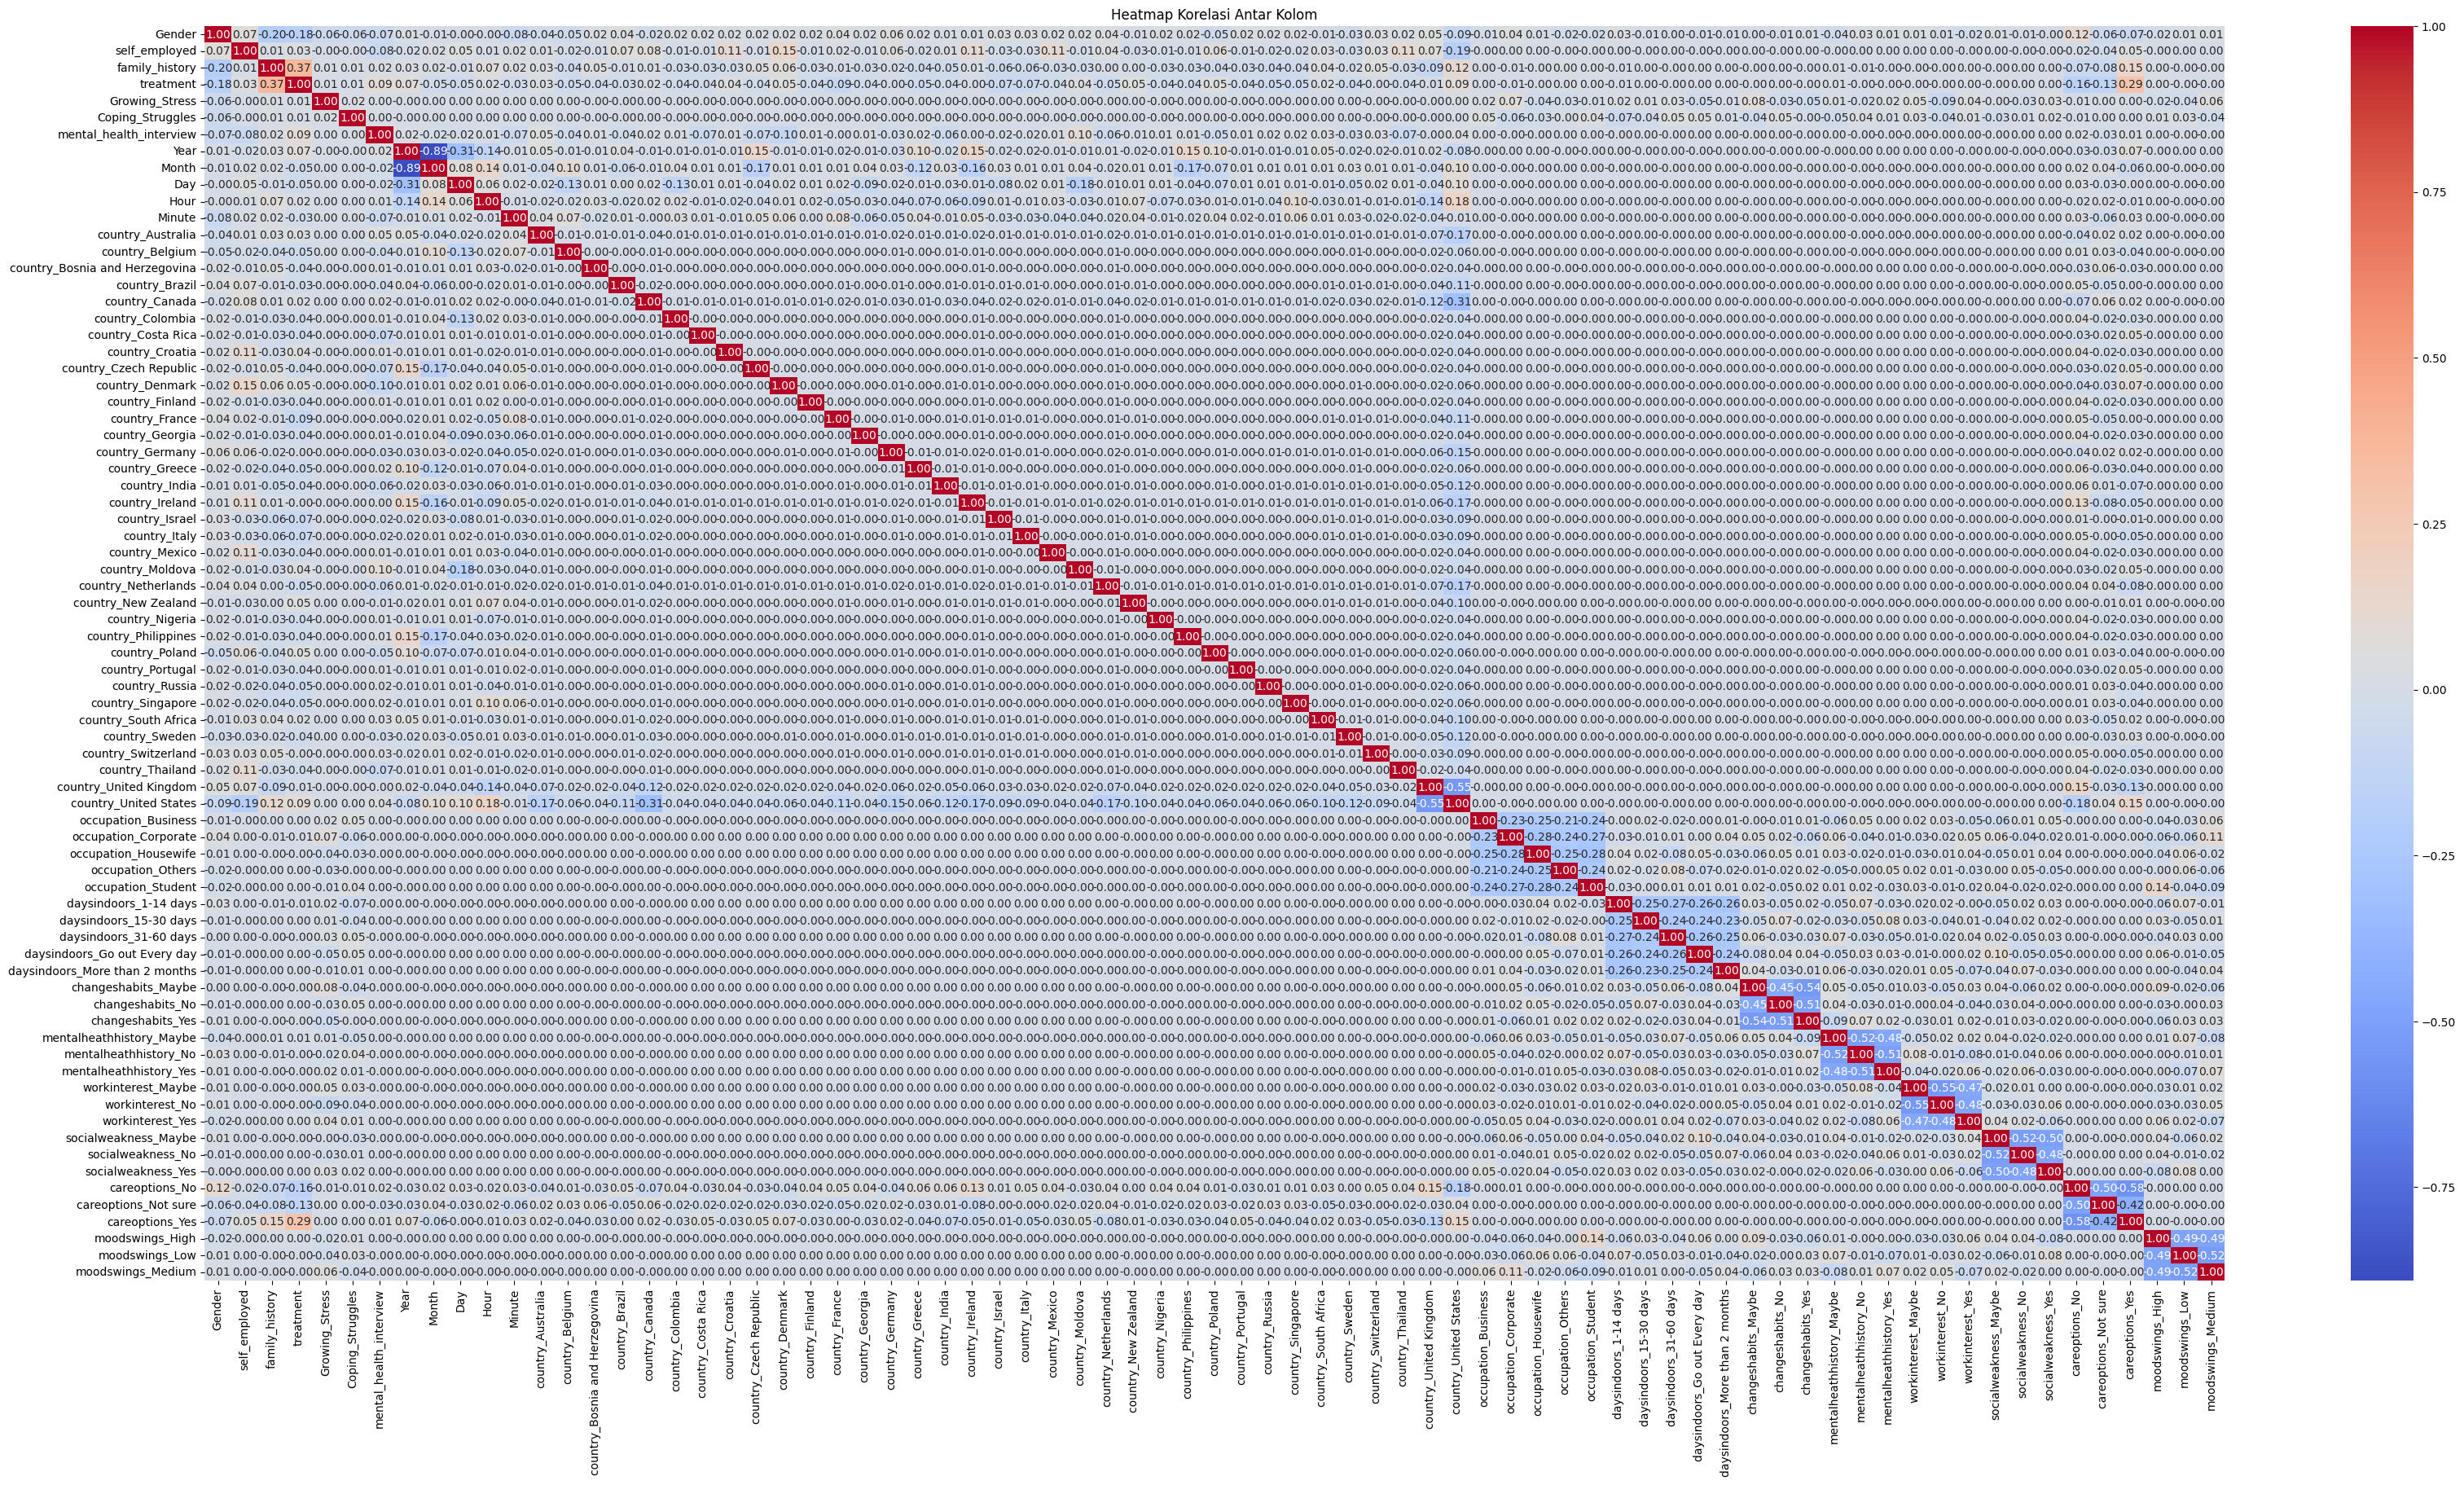

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mencari korelasi antar kolom
correlation_matrix = data.corr()

# Menciptakan heatmap dari matriks korelasi dengan dimensi yang lebih besar
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

In [ ]:
# Menentukan variabel x sebagai semua kolom kecuali "mental_health_interview"
X = data.drop("mental_health_interview", axis=1)

In [ ]:
# Membuat variabel y dengan kolom "mental_health_interview"
y = data["mental_health_interview"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X

,Gender,self_employed,family_history,treatment,Growing_Stress,Coping_Struggles,Year,Month,Day,Hour,...,workinterest_Yes,socialweakness_Maybe,socialweakness_No,socialweakness_Yes,careoptions_No,careoptions_Not sure,careoptions_Yes,moodswings_High,moodswings_Low,moodswings_Medium
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.6,0.866667,0.478261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.5,0.866667,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
292360,1.0,0.0,1.0,1.0,0.5,1.0,0.5,0.6,0.533333,0.391304,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
292361,1.0,0.0,1.0,0.0,0.5,1.0,0.5,0.6,0.800000,0.826087,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
292362,1.0,0.0,1.0,1.0,0.5,1.0,0.5,0.7,0.833333,0.043478,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


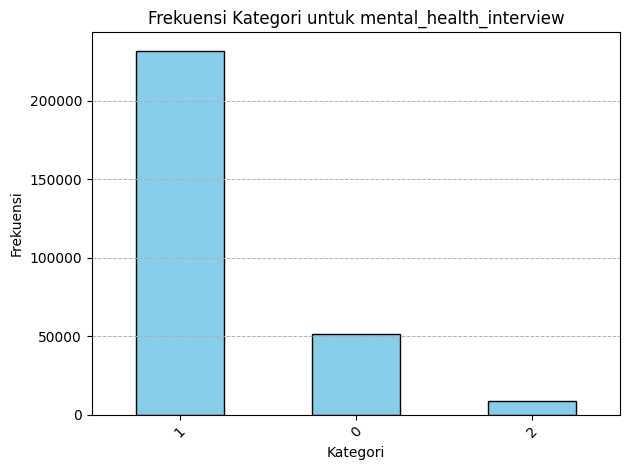

In [ ]:
import pandas as pd

# Analisis untuk kolom kategorikal
categorical_columns = ['mental_health_interview']  # Tambahkan 'mental_health_interview' ke dalam list
for col in categorical_columns:
    # Plotting bar chart
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Frekuensi Kategori untuk {col}')
    plt.xlabel('Kategori')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()

    # Tampilkan plot
    plt.show()

#Teknik Oversampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE
smote = SMOTE()
X,  y = smote.fit_resample(X, y)

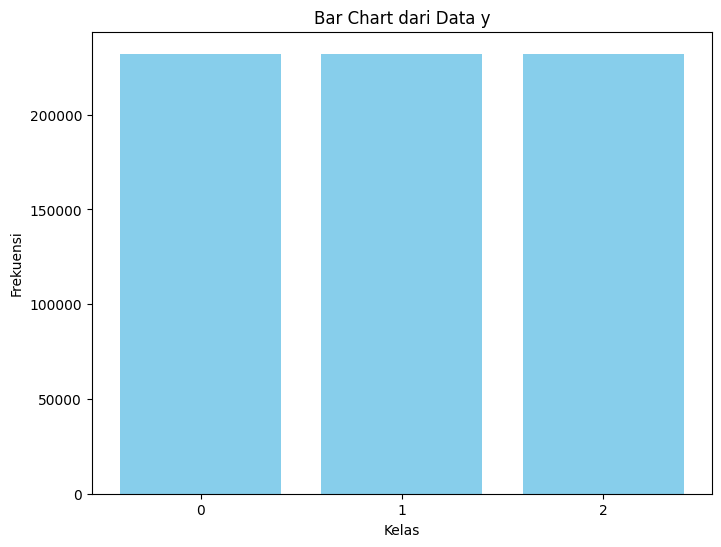

In [ ]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing kelas dalam data y
unique_classes, class_counts = np.unique(y, return_counts=True)

# Buat bar chart dari frekuensi kelas
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.title('Bar Chart dari Data y')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.xticks(unique_classes)  # Mengatur label sumbu x sesuai dengan kelas unik
plt.show()


#Pembuatan Model dan Evaluasi XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah seluruh dataset:", len(X))
print("Jumlah dataset setelah splitting data untuk training:", len(X_train))
print("Jumlah dataset setelah splitting data untuk testing:", len(X_test))

Jumlah seluruh dataset: 696498
Jumlah dataset setelah splitting data untuk training: 557198
Jumlah dataset setelah splitting data untuk testing: 139300


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def xgboost_model(X, y, test_size=0.2, random_state=42):
    # Memisahkan data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inisialisasi dan latih model XGBoost
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = xgb_model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Membuat heatmap confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil evaluasi
    evaluation_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return evaluation_results

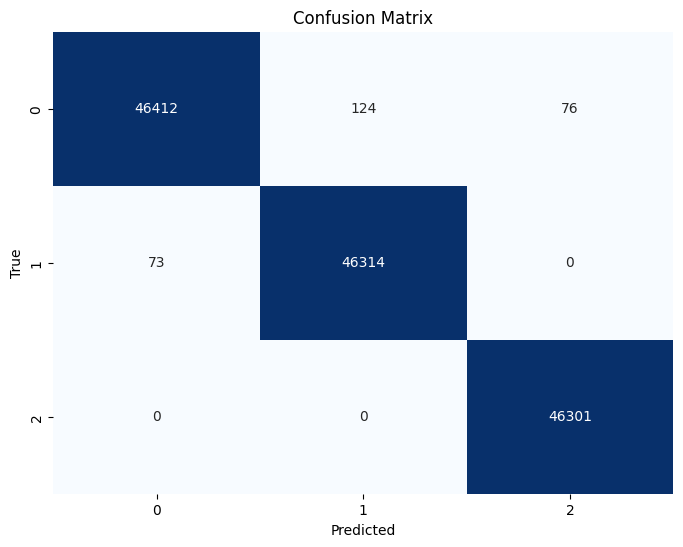

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46612
           1       1.00      1.00      1.00     46387
           2       1.00      1.00      1.00     46301

    accuracy                           1.00    139300
   macro avg       1.00      1.00      1.00    139300
weighted avg       1.00      1.00      1.00    139300

Accuracy: 0.9980402010050251
Precision: 0.9980406409575713
Recall: 0.9980402010050251
F1-score: 0.9980394764580945


In [ ]:
# Memanggil fungsi evaluasi
evaluation_results = xgboost_model(X, y)

# Menampilkan hasil evaluasi
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-score:", evaluation_results['f1_score'])

#Pembuatan Model dan Evaluasi Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def random_forest(X, y, test_size=0.2, random_state=42):
    # Memisahkan data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inisialisasi dan latih model Decision Tree
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = rf_model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Membuat heatmap confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil evaluasi
    evaluation_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return evaluation_results

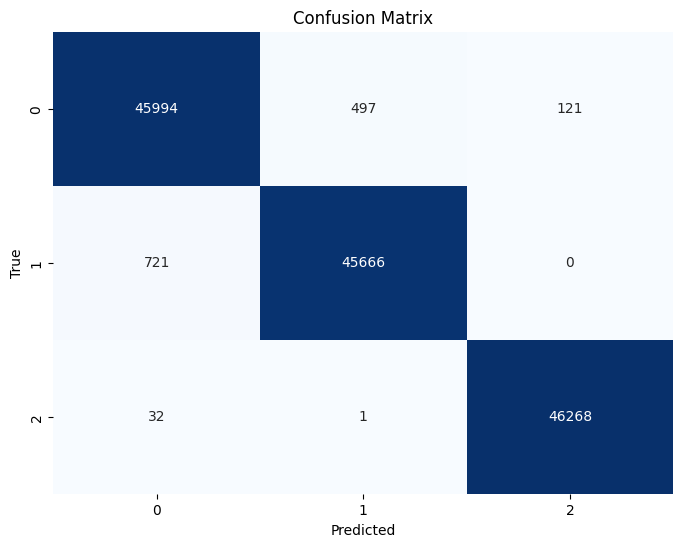

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     46612
           1       0.99      0.98      0.99     46387
           2       1.00      1.00      1.00     46301

    accuracy                           0.99    139300
   macro avg       0.99      0.99      0.99    139300
weighted avg       0.99      0.99      0.99    139300

Accuracy: 0.9901507537688442
Precision: 0.9901507428173979
Recall: 0.9901507537688442
F1-score: 0.9901478519641035


In [ ]:
# Memanggil fungsi evaluasi
evaluation_results = random_forest(X, y)

# Menampilkan hasil evaluasi
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-score:", evaluation_results['f1_score'])